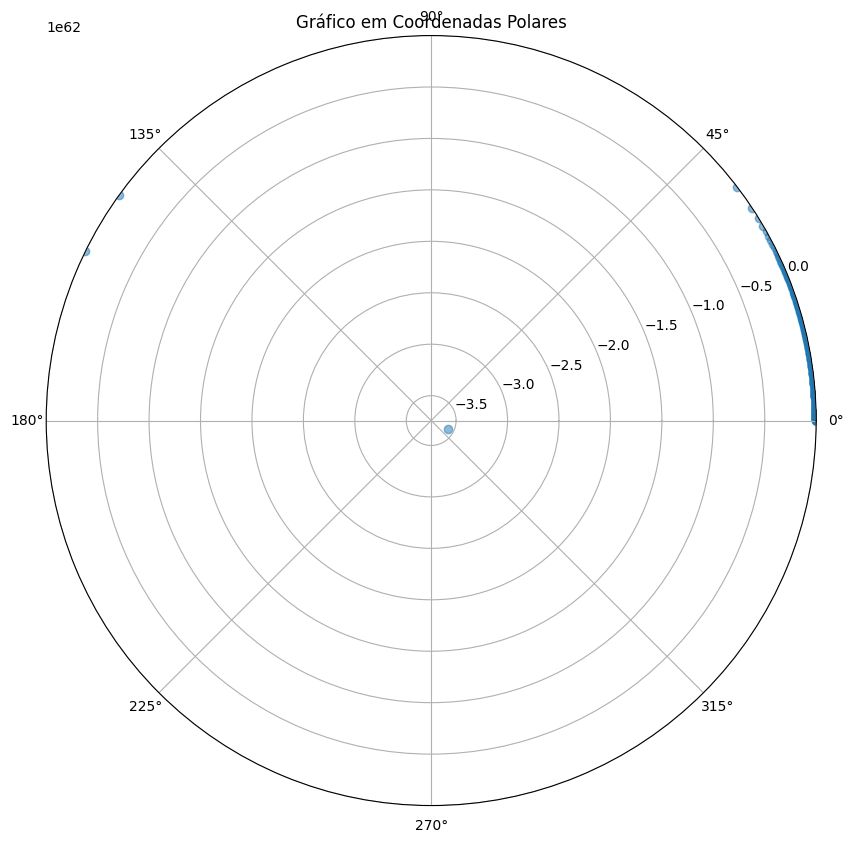

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plotar_coordenadas_polares(nome_arquivo):
    """
    Função para ler arquivo e criar gráfico polar
    
    Parameters:
    nome_arquivo (str): Caminho para o arquivo de dados
    """
    try:
        # Carrega os dados do arquivo
        # Assume que as colunas são separadas por espaço ou tabulação
        dados = np.loadtxt(nome_arquivo,skiprows=1)
        
        # Extrai as colunas 2 e 3 (índices 1 e 2 em Python)
        raios = dados[:, 1]  # coluna 2
        angulos = dados[:, 2]# coluna 3
        
        # Cria a figura com subplot polar
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='polar')
        
        # Plota os dados
        ax.scatter(angulos, raios, alpha=0.5)
        
        # Personaliza o gráfico
        ax.set_title('Gráfico em Coordenadas Polares')
        ax.grid(True)
        
        # Exibe o gráfico
        plt.show()
        
    except FileNotFoundError:
        print(f"Erro: O arquivo {nome_arquivo} não foi encontrado.")
    except IndexError:
        print("Erro: O arquivo não possui colunas suficientes.")
    except Exception as e:
        print(f"Erro inesperado: {str(e)}")

# Exemplo de uso
if __name__ == "__main__":
    # Substitua 'dados.txt' pelo nome do seu arquivo
    plotar_coordenadas_polares('orbit_data.txt')